In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lianurmalasari","key":"50f0e4120fd7c29d1320752e3b28a4bb"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d neuromusic/avocado-prices

  0% 0.00/629k [00:00<?, ?B/s]
100% 629k/629k [00:00<00:00, 50.8MB/s]


In [4]:
!mkdir avocado-prices
!unzip avocado-prices.zip -d avocado-prices
!ls avocado-prices

Archive:  avocado-prices.zip
  inflating: avocado-prices/avocado.csv  
avocado.csv


In [5]:
import pandas as pd
import numpy as np

# library untuk lvisualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# library yang digunakan untuk forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [90]:
df = pd.read_csv("/content/avocado-prices/avocado.csv")

In [91]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [93]:
df.shape

(18249, 14)

In [94]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [95]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [96]:
df = df.drop(['Unnamed: 0','Total Volume', '4046', '4225','4770', 'Total Bags',
              'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'], axis=1)

In [97]:
df.head()

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
dtypes: float64(1), object(1)
memory usage: 285.3+ KB


In [99]:
df['Date'] = pd.to_datetime(df['Date'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 285.3 KB


In [101]:
df.head()

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [102]:
df.set_index("Date", inplace=True)

In [109]:
df = df.resample('W').sum()

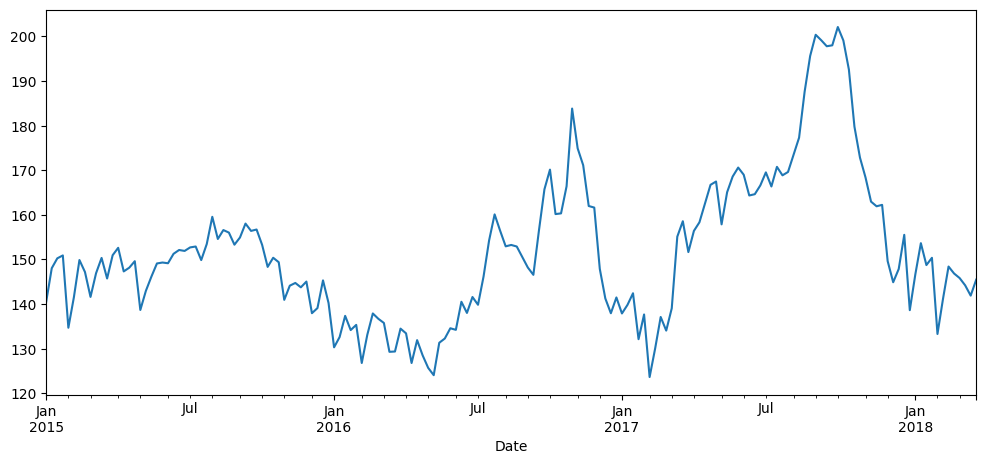

In [110]:
df['AveragePrice'].plot(figsize=(12,5));

In [111]:
df.head()

,AveragePrice
Date,
2015-01-04,140.54
2015-01-11,148.03
2015-01-18,150.24
2015-01-25,150.89
2015-02-01,134.68


In [112]:
df.index.min(), df.index.max()

(Timestamp('2015-01-04 00:00:00', freq='W-SUN'),
 Timestamp('2018-03-25 00:00:00', freq='W-SUN'))

In [113]:
df.shape

(169, 1)

In [116]:
train = df.iloc[:100]
test = df.iloc[101:]

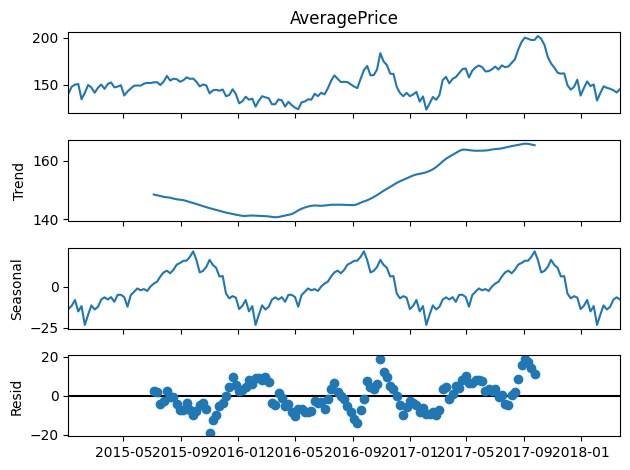

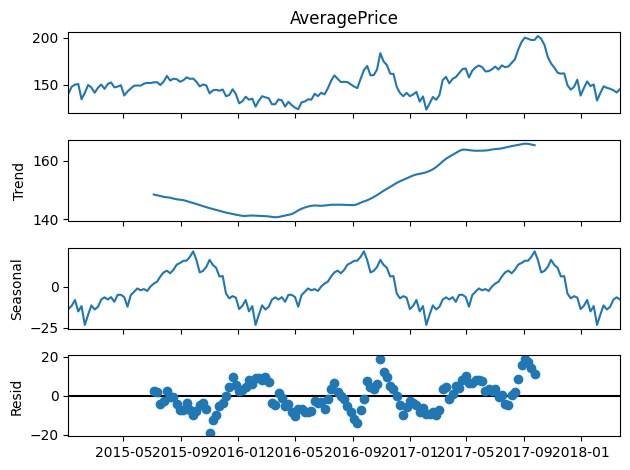

In [117]:
decompose_add = seasonal_decompose(df['AveragePrice'])
decompose_add.plot()

In [118]:
diff_df = df.diff()
diff_df.head()

,AveragePrice
Date,
2015-01-04,NaN
2015-01-11,7.49
2015-01-18,2.21
2015-01-25,0.65
2015-02-01,-16.21


In [119]:
diff_df.dropna(inplace=True)

<Axes: xlabel='Date'>

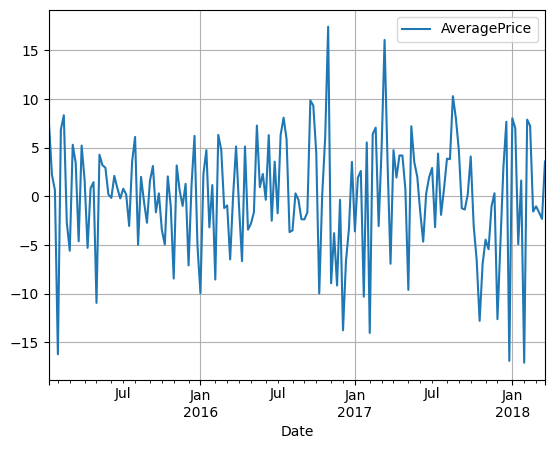

In [120]:
diff_df.plot(grid=True)

In [121]:
result = adfuller(diff_df)
# The result is a tuple that contains various test statistics and p-values
# You can access specific values as follows:
adf_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

ADF Statistic: -13.199063614064011
p-value: 1.1039653516206237e-24


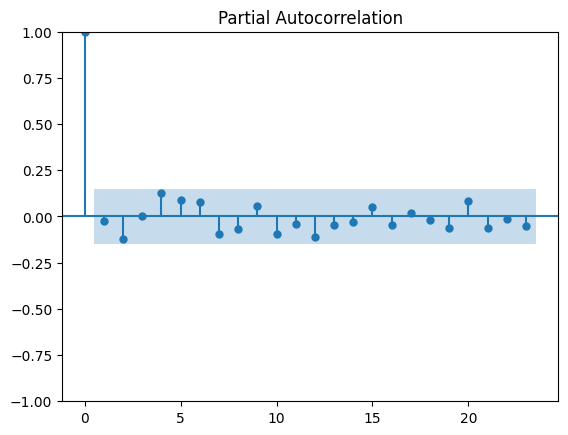

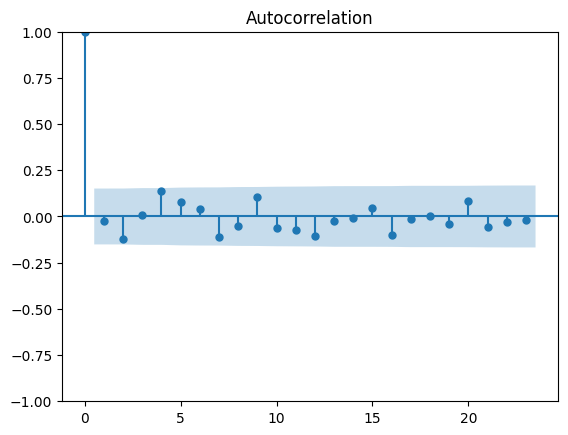

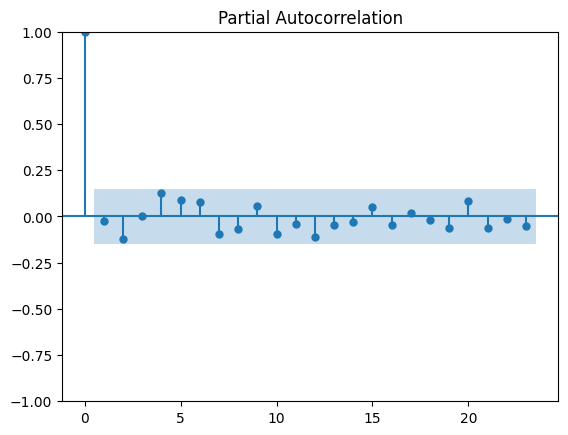

In [122]:
plot_acf(diff_df)
plot_pacf(diff_df)

In [123]:
df.shape

(169, 1)

# Single Exponential Smoothing

In [124]:
single_exp = SimpleExpSmoothing(train).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(68)

<Axes: xlabel='Date'>

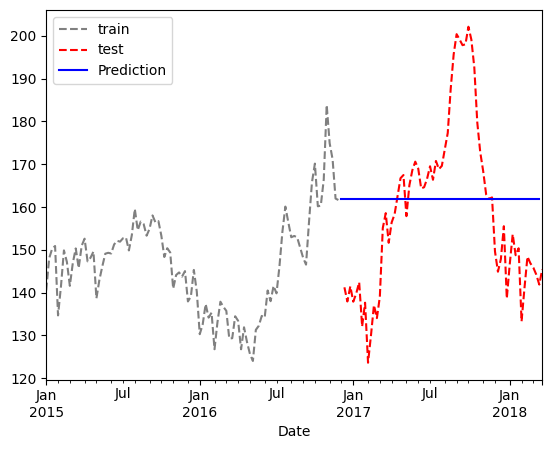

In [126]:
train['AveragePrice'].plot(style='--', color='gray', legend=True, label='train')
test['AveragePrice'].plot(style='--', color='r', legend=True, label='test')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [127]:
Train_RMSE_SES = mean_squared_error(train, single_exp_train_pred)**0.5
Test_RMSE_SES = mean_squared_error(test, single_exp_test_pred)**0.5
Train_MAPE_SES = mean_absolute_percentage_error(train, single_exp_train_pred)
Test_MAPE_SES = mean_absolute_percentage_error(test, single_exp_test_pred)

print('Train RMSE :',Train_RMSE_SES)
print('Test RMSE :', Test_RMSE_SES)
print('Train MAPE :', Train_MAPE_SES)
print('Test MAPE :', Test_MAPE_SES)

Train RMSE : 5.153814386780101
Test RMSE : 19.64903748252027
Train MAPE : 0.026191870205027584
Test MAPE : 0.10254968128586632


# Double Exponential Smoothing

In [129]:
double_exp = ExponentialSmoothing(train, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(68)

<Axes: xlabel='Date'>

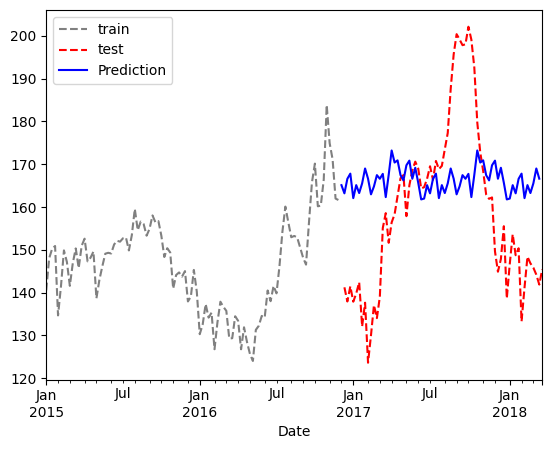

In [130]:
train['AveragePrice'].plot(style='--', color='gray', legend=True, label='train')
test['AveragePrice'].plot(style='--', color='r', legend=True, label='test')
double_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [131]:
Train_RMSE_DES = mean_squared_error(train, double_exp_train_pred)**0.5
Test_RMSE_DES = mean_squared_error(test, double_exp_test_pred)**0.5
Train_MAPE_DES = mean_absolute_percentage_error(train, double_exp_train_pred)
Test_MAPE_DES = mean_absolute_percentage_error(test, double_exp_test_pred)

print('Train RMSE :',Train_RMSE_DES)
print('Test RMSE :', Test_RMSE_DES)
print('Train MAPE :', Train_MAPE_DES)
print('Test MAPE :', Test_MAPE_DES)

Train RMSE : 5.008014846943417
Test RMSE : 20.659434661969186
Train MAPE : 0.02371272497473234
Test MAPE : 0.11139236252098973


# ARIMA

In [132]:
ar = ARIMA(train, order=(15,1,15)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(68)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

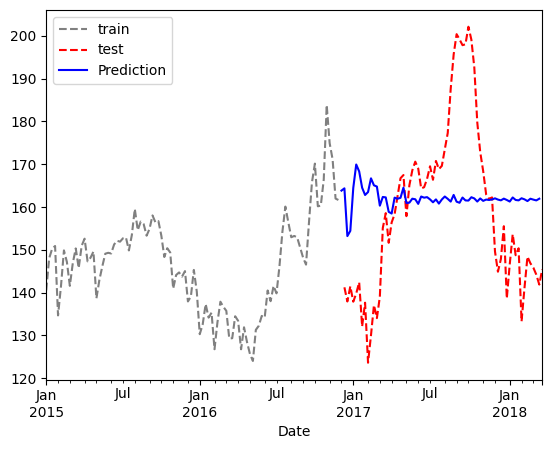

In [133]:
train['AveragePrice'].plot(style='--', color='gray', legend=True, label='train')
test['AveragePrice'].plot(style='--', color='r', legend=True, label='test')
ar_test_pred.plot(color='b', legend=True, label='Prediction')

In [134]:
Train_RMSE_AR = mean_squared_error(train, ar_train_pred)**0.5
Test_RMSE_AR = mean_squared_error(test, ar_test_pred)**0.5
Train_MAPE_AR = mean_absolute_percentage_error(train, ar_train_pred)
Test_MAPE_AR = mean_absolute_percentage_error(test, ar_test_pred)

print('Train RMSE :',Train_RMSE_AR)
print('Test RMSE :', Test_RMSE_AR)
print('Train MAPE :', Train_MAPE_AR)
print('Test MAPE :', Test_MAPE_AR)

Train RMSE : 14.635330876406917
Test RMSE : 20.204805696354683
Train MAPE : 0.03223810862444207
Test MAPE : 0.10467032195997751


# Perbandingan Algoritma

In [135]:
comparision_df = pd.DataFrame(data=[
    ['Single Exp Smoothing', Test_RMSE_SES, Test_MAPE_SES],
    ['Double Exp Smoothing', Test_RMSE_DES, Test_MAPE_DES],
    ['ARIMA', Test_RMSE_AR, Test_MAPE_AR]
    ],
    columns=['Model', 'RMSE', 'MAPE'])
comparision_df.set_index('Model', inplace=True)

In [136]:
comparision_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
Single Exp Smoothing,19.649037,0.102550
ARIMA,20.204806,0.104670
Double Exp Smoothing,20.659435,0.111392


In [140]:
single_exp = SimpleExpSmoothing(df).fit()
single_exp_test_pred = single_exp.forecast(68)

<Axes: xlabel='Date'>

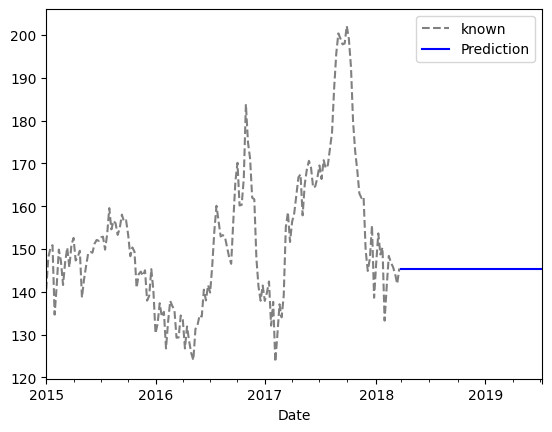

In [141]:
df['AveragePrice'].plot(style='--', color='gray', legend=True, label='known')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [142]:
import pickle
pickle.dump(ar, open('forecast-ses.sav','wb'))